###

need: 
- 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import cmocean 
import warnings
import arrow
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
from salishsea_tools import visualisations as vis
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

## undersaturated percents are calculated in:
    KEY_OMA OmA_percent_domain_cells_undersaturated_calculator

# code for extracting OmA averages -winter/summer

In [4]:
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

# BR_oma_summer_mean = np.nanmean(BR_oma_summer,axis=0)
# pickle.dump(BR_oma_summer_mean, open("../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl", 'wb'))
# print(np.shape(BR_oma_summer_mean))

# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = t_Oma

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = t_Oma

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl", 'wb'))




In [5]:
BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI9_summer_3mon = pickle.load(open('../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI9_winter_3mon = pickle.load(open('../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [6]:
days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5

days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5


PI_under_0pt5_vol = pickle.load(open('./pkls/PI9_under_0pt5_vol.pkl', 'rb'))   
PI_under_0pt6_vol = pickle.load(open('./pkls/PI9_under_0pt6_vol.pkl', 'rb'))   
PI_under_0pt7_vol = pickle.load(open('./pkls/PI9_under_0pt7_vol.pkl', 'rb'))   
PI_under_0pt8_vol = pickle.load(open('./pkls/PI9_under_0pt8_vol.pkl', 'rb'))   
PI_under_0pt9_vol = pickle.load(open('./pkls/PI9_under_0pt9_vol.pkl', 'rb'))   
PI_under_1pt0_vol = pickle.load(open('./pkls/PI9_under_1pt0_vol.pkl', 'rb'))   
PI_under_1pt1_vol = pickle.load(open('./pkls/PI9_under_1pt1_vol.pkl', 'rb'))   
PI_under_1pt2_vol = pickle.load(open('./pkls/PI9_under_1pt2_vol.pkl', 'rb'))   
PI_under_1pt3_vol = pickle.load(open('./pkls/PI9_under_1pt3_vol.pkl', 'rb'))   
PI_under_1pt4_vol = pickle.load(open('./pkls/PI9_under_1pt4_vol.pkl', 'rb'))   
PI_under_1pt5_vol = pickle.load(open('./pkls/PI9_under_1pt5_vol.pkl', 'rb'))   

BR_under_0pt5_vol = pickle.load(open('./pkls/BR3_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('./pkls/BR3_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('./pkls/BR3_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('./pkls/BR3_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('./pkls/BR3_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('./pkls/BR3_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('./pkls/BR3_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('./pkls/BR3_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('./pkls/BR3_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('./pkls/BR3_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('./pkls/BR3_under_1pt5_vol.pkl', 'rb'))   

## 'Nicest' plot so far - 3 month averages

#### histogram of summer and winter means

In [7]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI9_summer_nn = PI9_summer_3mon[PI9_summer_3mon<1e10]
PI9_winter_nn = PI9_winter_3mon[PI9_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 40
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI9_summer, bins = np.histogram(PI9_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI9_winter, bins = np.histogram(PI9_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)


bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(hist_BR3_summer)

#### calculate summer winter  differences in asat

In [8]:
BR3_summer_fm = np.copy(BR3_summer_3mon)
BR3_summer_fm[BR3_summer_fm>1e10] = np.nan
BR3_summer_fm[BR3_summer_fm== 0 ] = np.nan
BR3_winter_fm = np.copy(BR3_winter_3mon)
BR3_winter_fm[BR3_winter_fm>1e10] = np.nan
BR3_winter_fm[BR3_winter_fm== 0 ] = np.nan

PI9_summer_fm = np.copy(PI9_summer_3mon)
PI9_summer_fm[PI9_summer_fm>1e10] = np.nan
PI9_summer_fm[PI9_summer_fm== 0 ] = np.nan

PI9_winter_fm = np.copy(PI9_winter_3mon)
PI9_winter_fm[PI9_winter_fm>1e10] = np.nan
PI9_winter_fm[PI9_winter_fm== 0 ] = np.nan

summer_diff = BR3_summer_fm-PI9_summer_fm
winter_diff = BR3_winter_fm-PI9_winter_fm
print(np.nanmin(summer_diff))
print(np.shape(BR3_summer_fm))

summer_mean_diff_dp = np.zeros(40)
winter_mean_diff_dp = np.zeros(40)
summer_std_diff_dp = np.zeros(40)
winter_std_diff_dp = np.zeros(40)

for i in range(0,40):
    summer_mean_diff_dp[i] = np.nanmean(summer_diff[i,:,:])
    summer_std_diff_dp[i] = np.nanstd(summer_diff[i,:,:])
    winter_mean_diff_dp[i] = np.nanmean(winter_diff[i,:,:])
    winter_std_diff_dp[i] = np.nanstd(winter_diff[i,:,:])

print('winter mean diff')
print(winter_mean_diff_dp)
print(np.nanmean(winter_mean_diff_dp))
print('summer mean diff')
print(summer_mean_diff_dp)
print(np.nanmean(summer_mean_diff_dp))


-0.6381389809691389
(40, 898, 398)
winter mean diff
[-0.2795815  -0.28394837 -0.28815171 -0.29095119 -0.29416557 -0.29580994
 -0.29715785 -0.29807379 -0.29870038 -0.29907288 -0.29924853 -0.29932554
 -0.29936145 -0.29943132 -0.29925573 -0.2990737  -0.29877139 -0.29843201
 -0.29794625 -0.29733842 -0.29640492 -0.29496049 -0.29273632 -0.28968482
 -0.28665043 -0.28274517 -0.27696611 -0.2708573  -0.26732075 -0.26557963
 -0.26576553 -0.26703907 -0.2672999  -0.26603171 -0.26387796 -0.26154615
 -0.26067074 -0.2600183  -0.26301691         nan]
-0.28494794200329093
summer mean diff
[-0.36179345 -0.36608289 -0.37155887 -0.37551611 -0.37819751 -0.37797514
 -0.37631    -0.37349927 -0.37009571 -0.36611224 -0.36200288 -0.35793539
 -0.35385424 -0.34987097 -0.34570909 -0.34154862 -0.33730683 -0.33275297
 -0.32763195 -0.32137204 -0.31314493 -0.30218623 -0.28859425 -0.27414784
 -0.25940846 -0.24789687 -0.24257559 -0.24102273 -0.24113992 -0.24332304
 -0.24940756 -0.25499138 -0.2605263  -0.26356452 -0.26430

In [9]:
#np.average(summer_diff[:,:,:],weights = csize)

masked_summer_diff = np.ma.masked_array(summer_diff, np.isnan(summer_diff))
# calculate your weighted average here instead
#weights = [1, 1, 1]

csize[np.isnan(csize)] = 0
average = np.ma.average(masked_summer_diff, weights=csize)
print(average)
masked_winter_diff = np.ma.masked_array(winter_diff, np.isnan(winter_diff))
# calculate your weighted average here instead
#weights = [1, 1, 1]

csize[np.isnan(csize)] = 0
average = np.ma.average(masked_winter_diff, weights=csize)
print(average)

-0.27379718505911227
-0.27834382767022764


In [10]:
depths = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tdepths = np.squeeze(depths['gdept_1d'][:])


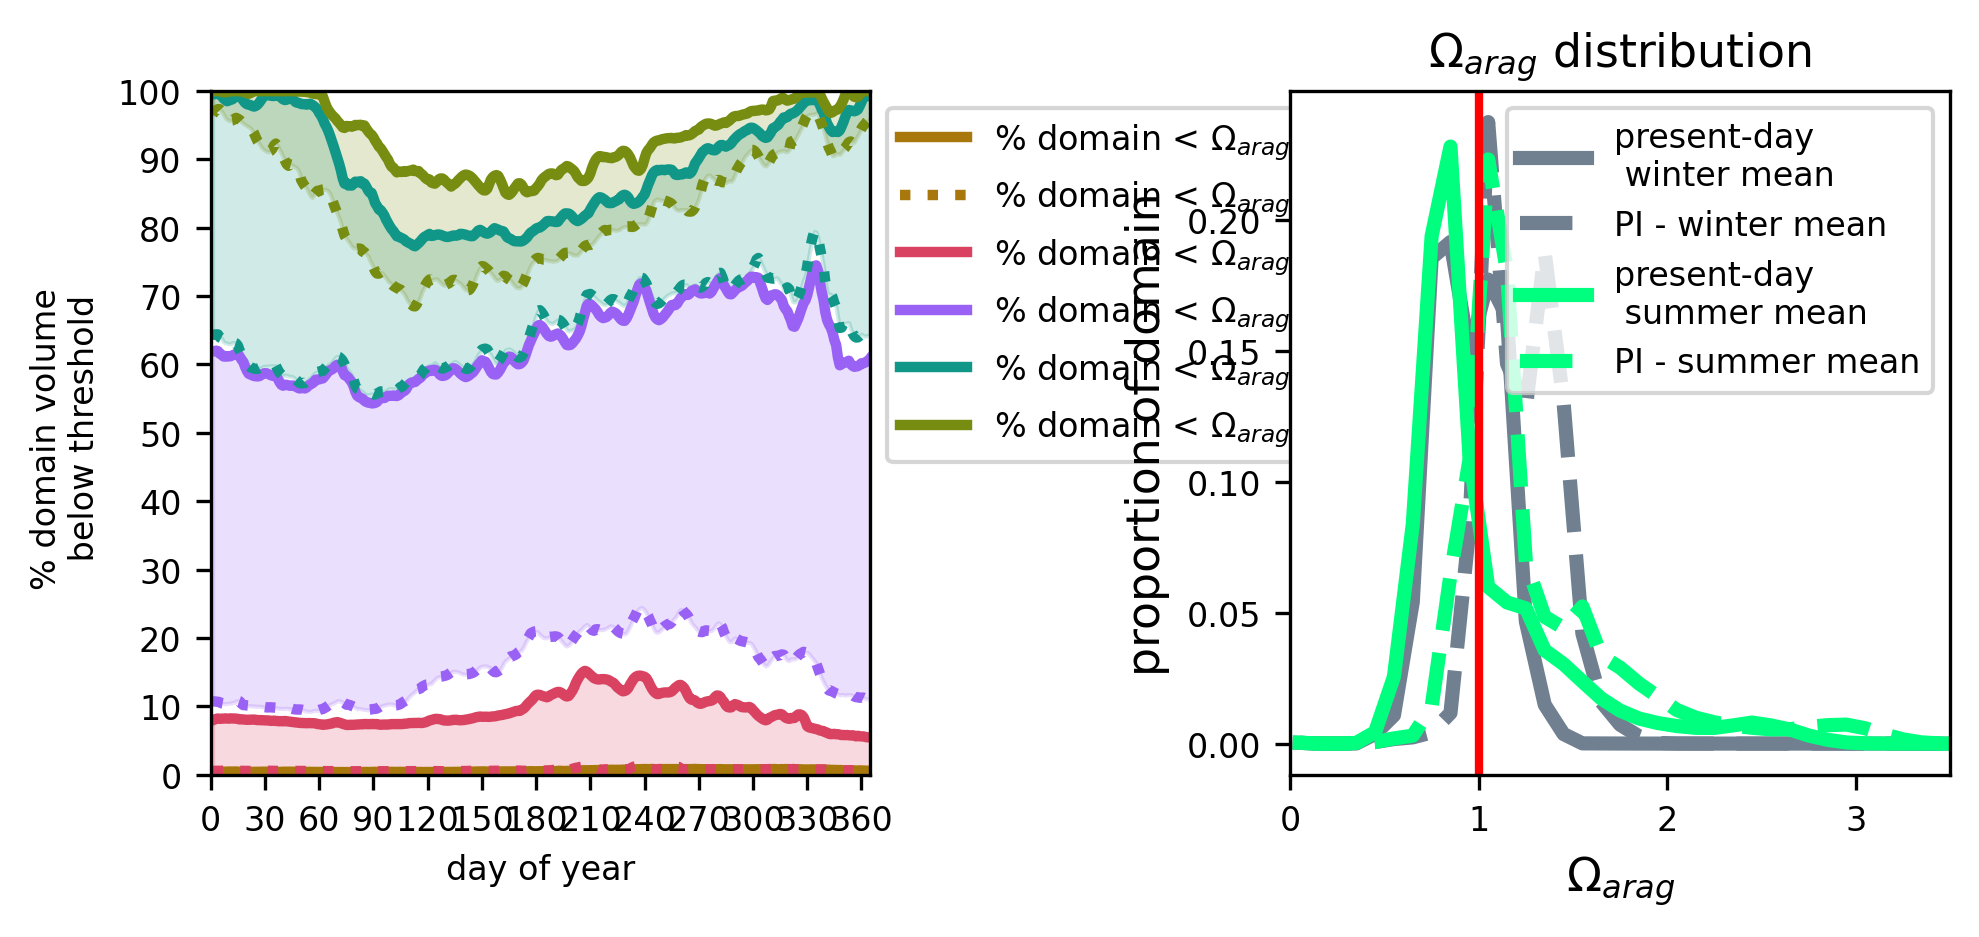

In [11]:
fact = 1
fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

fig = plt.figure(figsize=(19/2.54, (23/3)/2.54), dpi = 300)
ax5 = plt.subplot2grid((1,5), (0,0), colspan=2, rowspan=1)

ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 0.5 (BR)')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = '% domain < $\Omega_{arag}$ 0.5 (PI)')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 0.7 (BR)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.0 (BR)')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.3 (BR)')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.5 (BR)')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)
ax5.legend(bbox_to_anchor=[1,1], fontsize = 8, ncol = 1)
w = ax5.set_xticks(np.arange(0, 365, step=30))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)

ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)

lw = 2.5
ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'present-day \n winter mean')
ax6.plot(bin_cent[0:nbins],hist_PI9_winter/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'present-day \n summer mean')
ax6.plot(bin_cent[0:nbins],hist_PI9_summer/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
ax6.legend(loc = 'best', fontsize = 8)
ax6.set_xlim([0,3.5])
ax6.set_title('$\Omega_{arag}$ distribution', fontsize = 11)
ax6.axvline(x = 1, color = 'red', lw = 2)
ax6.set_xlabel('$\Omega_{arag}$',  fontsize = 11)
ax6.set_ylabel('proportion of domain', fontsize = 11)
plt.tight_layout()

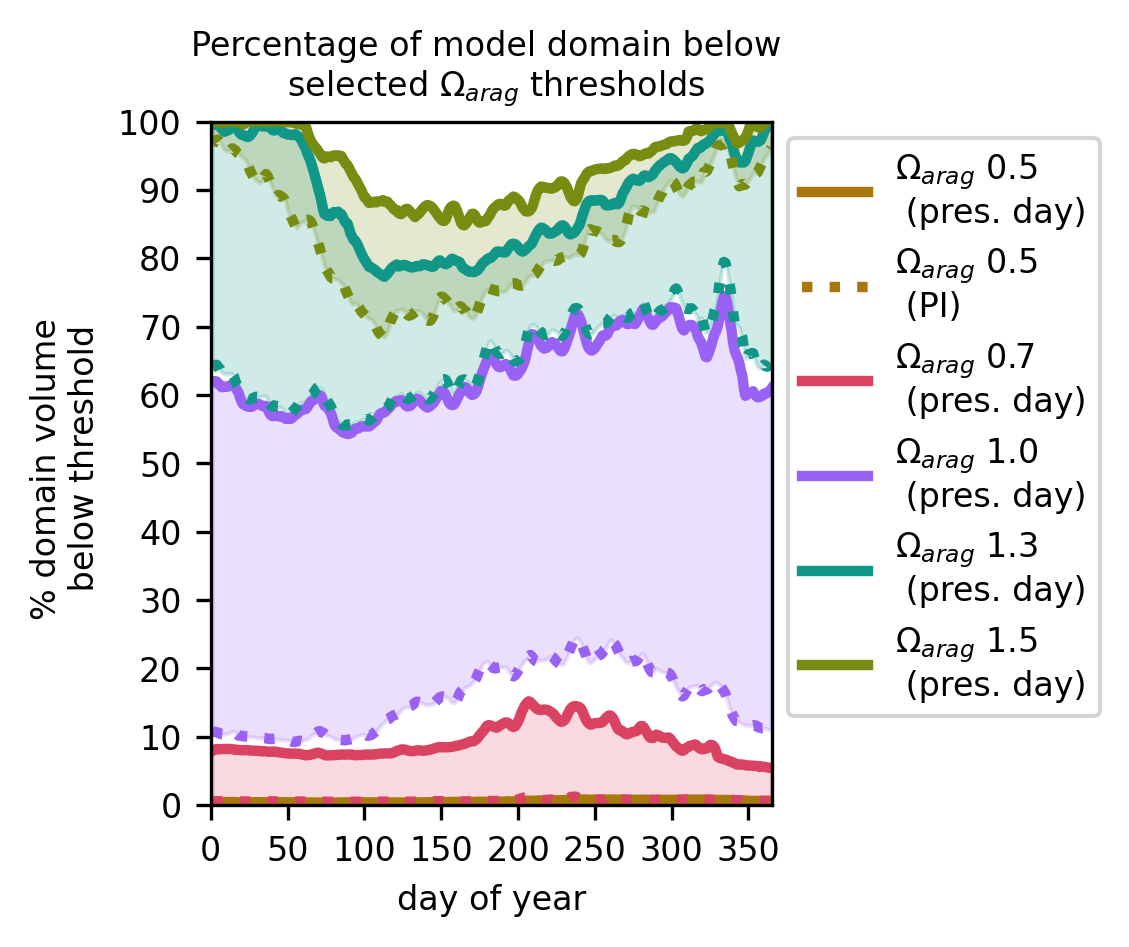

In [12]:
fact = 1
fs = 8
# fig = plt.figure(figsize=(12*fact, 3.5*fact))
fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)
ax5 = plt.subplot2grid((1,5), (0,0), colspan=3, rowspan=1)

ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (pres. day)')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7 \n (pres. day)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.0 \n (pres. day)')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3 \n (pres. day)')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5 \n (pres. day)')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)
ax5.legend(bbox_to_anchor=[1,1], fontsize = 8, ncol = 1)
w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds', fontsize = 8)

# ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)

# lw = 2.5
# ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_winter/tot_count, \
#          color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
# ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_summer/tot_count, \
#          color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
# ax6.legend(loc = 'best')
# ax6.set_xlim([0,3.5])
# ax6.set_title('$\Omega_A$ distribution')
# ax6.axvline(x = 1, color = 'red', lw = 2)
# ax6.set_xlabel('$\Omega_A$')
# ax6.set_ylabel('proportion of domain')
plt.tight_layout()

plt.savefig('Fig4e.jpg')

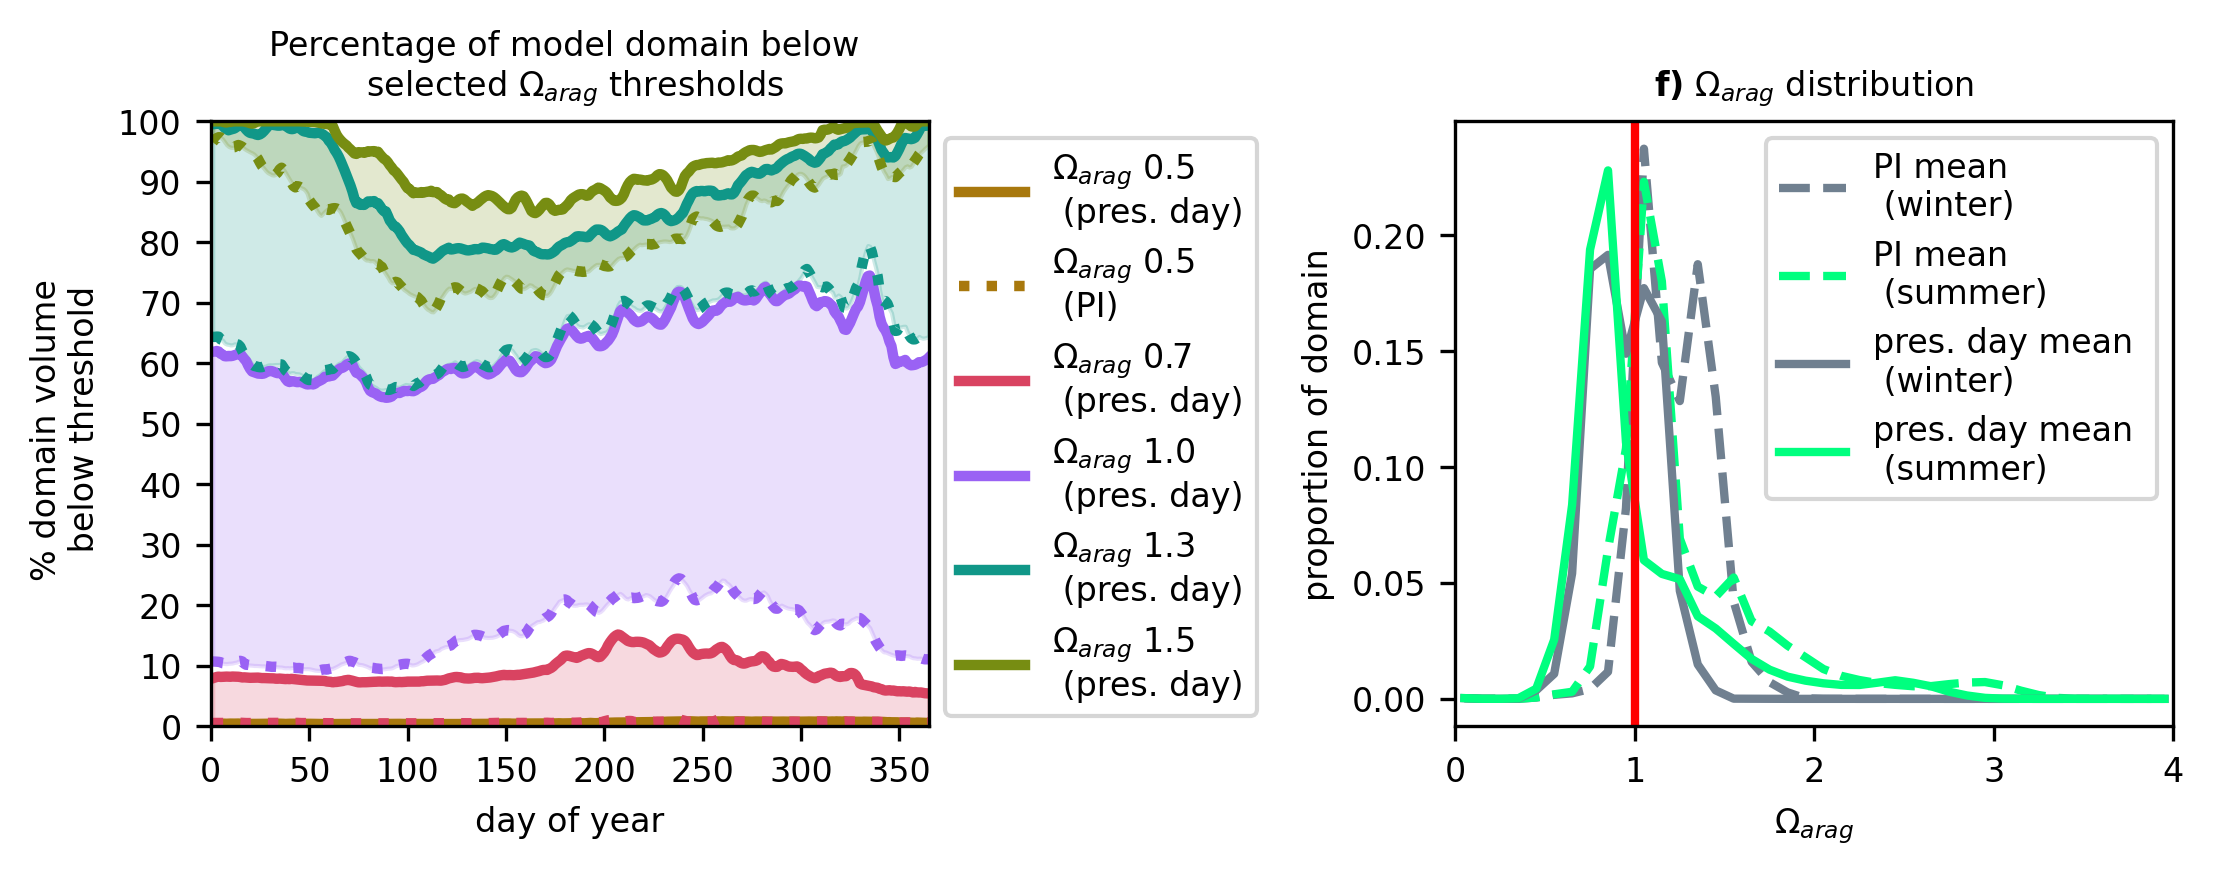

In [13]:
fact = 1
fs = 8
# fig = plt.figure(figsize=(12*fact, 3.5*fact))
fig = plt.figure(figsize=(19*(1)/2.54, (23/3)/2.54), dpi = 300)
ax5 = plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)

ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (pres. day)')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7 \n (pres. day)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.0 \n (pres. day)')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3 \n (pres. day)')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5 \n (pres. day)')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)
ax5.legend(bbox_to_anchor=[1,1], fontsize = 8, ncol = 1)
w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds', fontsize = 8)

# ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)
ax6 = plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)

lw = 2.5
ax6.plot(bin_cent[0:nbins],hist_PI9_winter/tot_count, \
         color = 'slategray', lw = 2.0, linestyle = '--', label = 'PI mean \n (winter)')
ax6.plot(bin_cent[0:nbins],hist_PI9_summer/tot_count, \
         color = 'springgreen', lw = 2.0, linestyle = '--', label = 'PI mean \n (summer)')
ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 2.0,label = 'pres. day mean \n (winter)')

ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 2.0,label = 'pres. day mean \n (summer)')

#ax6.legend(loc = 'upper right', fontsize = 8)#, ha ='right')
ax6.legend(bbox_to_anchor=[1,1], fontsize = 8, ncol = 1)
ax6.set_xlim([0,4])
ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
ax6.axvline(x = 1, color = 'red', lw = 2)
ax6.set_xlabel('$\Omega_{arag}$',  fontsize = 8)
ax6.set_ylabel('proportion of domain', fontsize = 8)
plt.tight_layout()

plt.savefig('Fig4e.jpg')

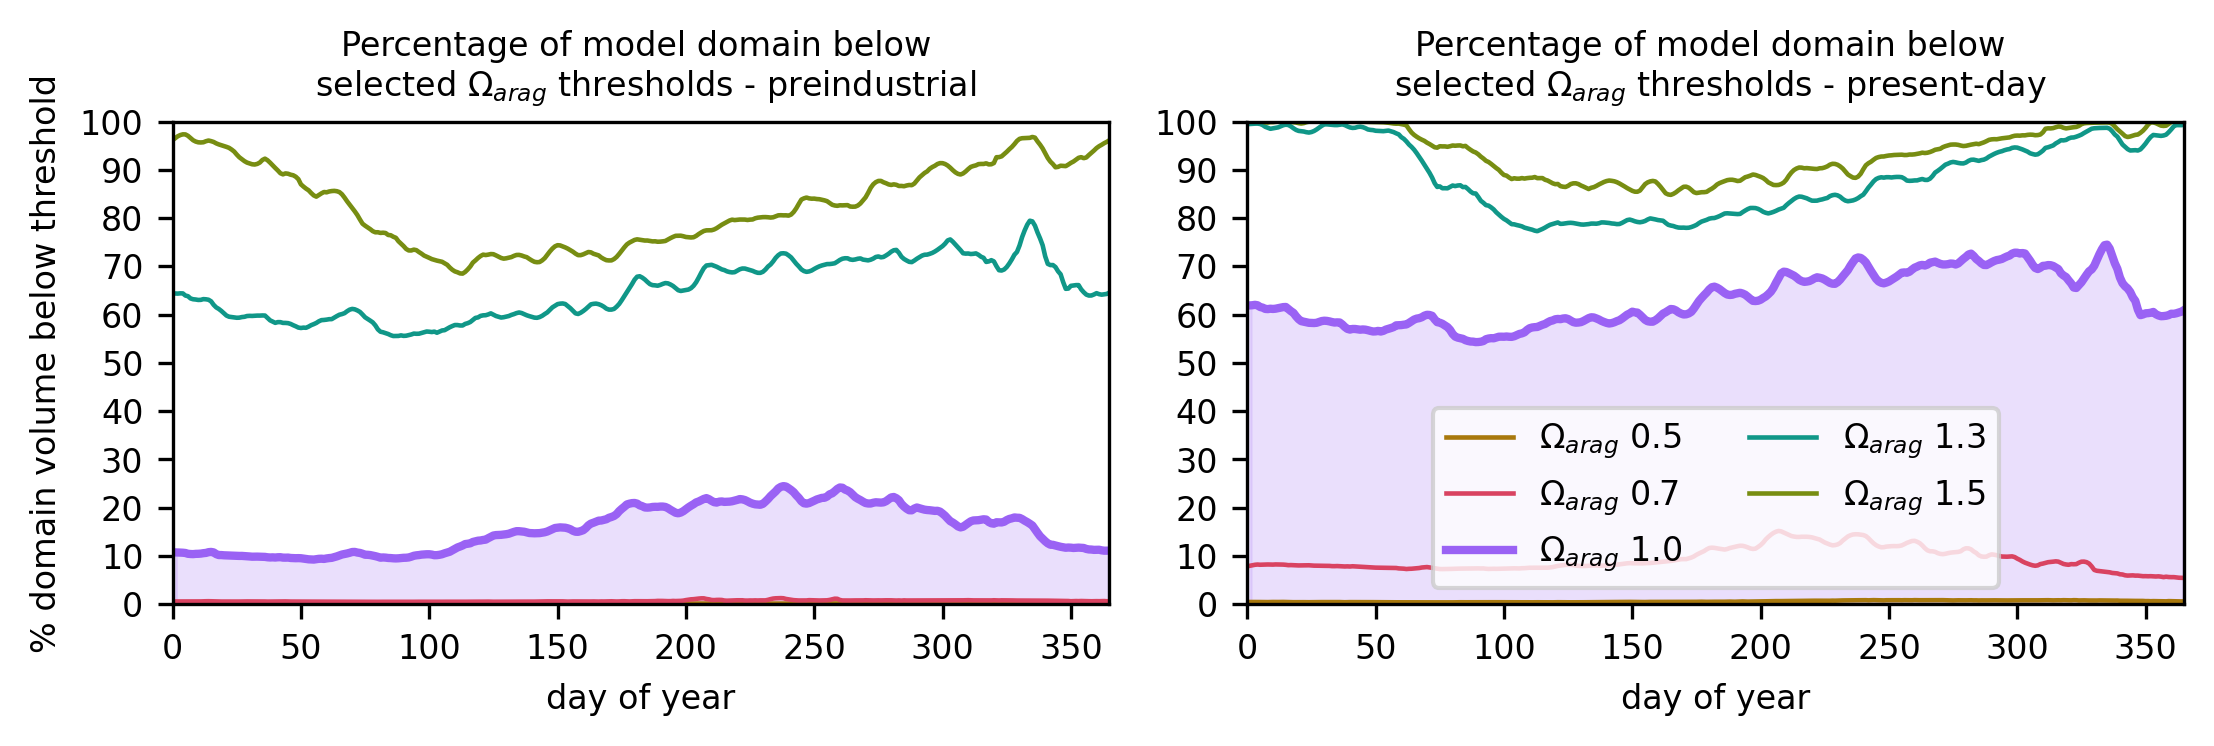

In [28]:
fact = 1
fs = 8

lw = 1.1
# fig = plt.figure(figsize=(12*fact, 3.5*fact))
fig = plt.figure(figsize=(19*(1)/2.54, (23/3.5)/2.54), dpi = 300)

#fig = plt.figure(figsize=(17*fact1/2.54,23*fact*(2/3)/2.54),dpi = 300)

ax5 = plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)

ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-')

ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-')
ax5.fill_between(days, np.zeros_like(days), PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)

w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds - preindustrial', fontsize = 8)

# ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)
ax5 = plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5')
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7')
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-', label = '$\Omega_{arag}$ 1.0')
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3')

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5')
ax5.fill_between(days, np.zeros_like(days), BR_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)

ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
ax5.legend(loc = 'lower center', ncol = 2, fontsize = 8 )
w = ax5.set_yticks(np.arange(0, 110, step=10))
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds - present-day', fontsize = 8)

plt.tight_layout()

#plt.savefig('Fig4e.jpg')

In [15]:
# fig = plt.figure(figsize=(19*(1/2)/2.54, (23/3)/2.54), dpi = 300)
# ax6 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)

# lw = 2.5
# ax6.plot(bin_cent[0:nbins],hist_PI5_winter/tot_count, \
#          color = 'slategray', lw = 2.0, linestyle = '--', label = 'PI mean \n (winter)')
# ax6.plot(bin_cent[0:nbins],hist_PI5_summer/tot_count, \
#          color = 'springgreen', lw = 2.0, linestyle = '--', label = 'PI mean \n (summer)')
# ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 2.0,label = 'pres. day mean \n (winter)')

# ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 2.0,label = 'pres. day mean \n (summer)')

# #ax6.legend(loc = 'upper right', fontsize = 8)#, ha ='right')
# ax6.legend(bbox_to_anchor=[1,1], fontsize = 8, ncol = 1)
# ax6.set_xlim([0,4])
# ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
# ax6.axvline(x = 1, color = 'red', lw = 2)
# ax6.set_xlabel('$\Omega_{arag}$',  fontsize = 8)
# ax6.set_ylabel('proportion of domain', fontsize = 8)
# plt.tight_layout()
# plt.savefig('Fig4f.jpg')

In [16]:
print(np.mean(BR_under_1pt0_vol))

0.6317683550337705


In [17]:
# bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
# mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# # vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
# #                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

# ts = 8 # title font
# fs = 8 # all other font sizes

# fig = plt.figure(figsize=(17/2.54,23*(2/3)/2.54),dpi = 300)

# ax1 = plt.subplot2grid((4,6), (0,0), colspan=3, rowspan=2)
# PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax1.set_ylim([0,420])
# ax1.invert_yaxis()
# ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_{arag}$', fontsize = fs)
# ax1.tick_params(axis='both', which='major', labelsize=fs)
# ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
# ax1.set_ylabel('depth [m]', fontsize = fs)
# cbar.remove()


# ax2 = plt.subplot2grid((4,6), (0,3), colspan=3, rowspan=2)
# PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax2, PI9_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax2.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_{arag}$', fontsize = fs)
# ax2.tick_params(axis='both', which='major', labelsize=fs)
# ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
# ax2.set_ylabel('depth [m]', fontsize = fs)
# cbar.remove()
# ax2.set_ylim([0,420])
# ax2.invert_yaxis()

# ax3 = plt.subplot2grid((4,6), (2,0), colspan=3, rowspan=2)
# BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax3.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_{arag}$', fontsize = fs)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
# ax3.set_ylabel('depth [m]', fontsize = fs)
# cbar.remove()
# ax3.set_ylim([0,420])
# ax3.invert_yaxis()

# ax4 = plt.subplot2grid((4,6), (2,3), colspan=3, rowspan=2)
# BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_{arag}$', fontsize = fs)
# ax4.tick_params(axis='both', which='major', labelsize=fs)
# ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
# ax4.set_ylabel('depth [m]', fontsize = fs)
# cbar.remove()
# ax4.set_ylim([0,420])
# ax4.invert_yaxis()

# plt.tight_layout()
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('Fig4a_d-fornow.jpg')

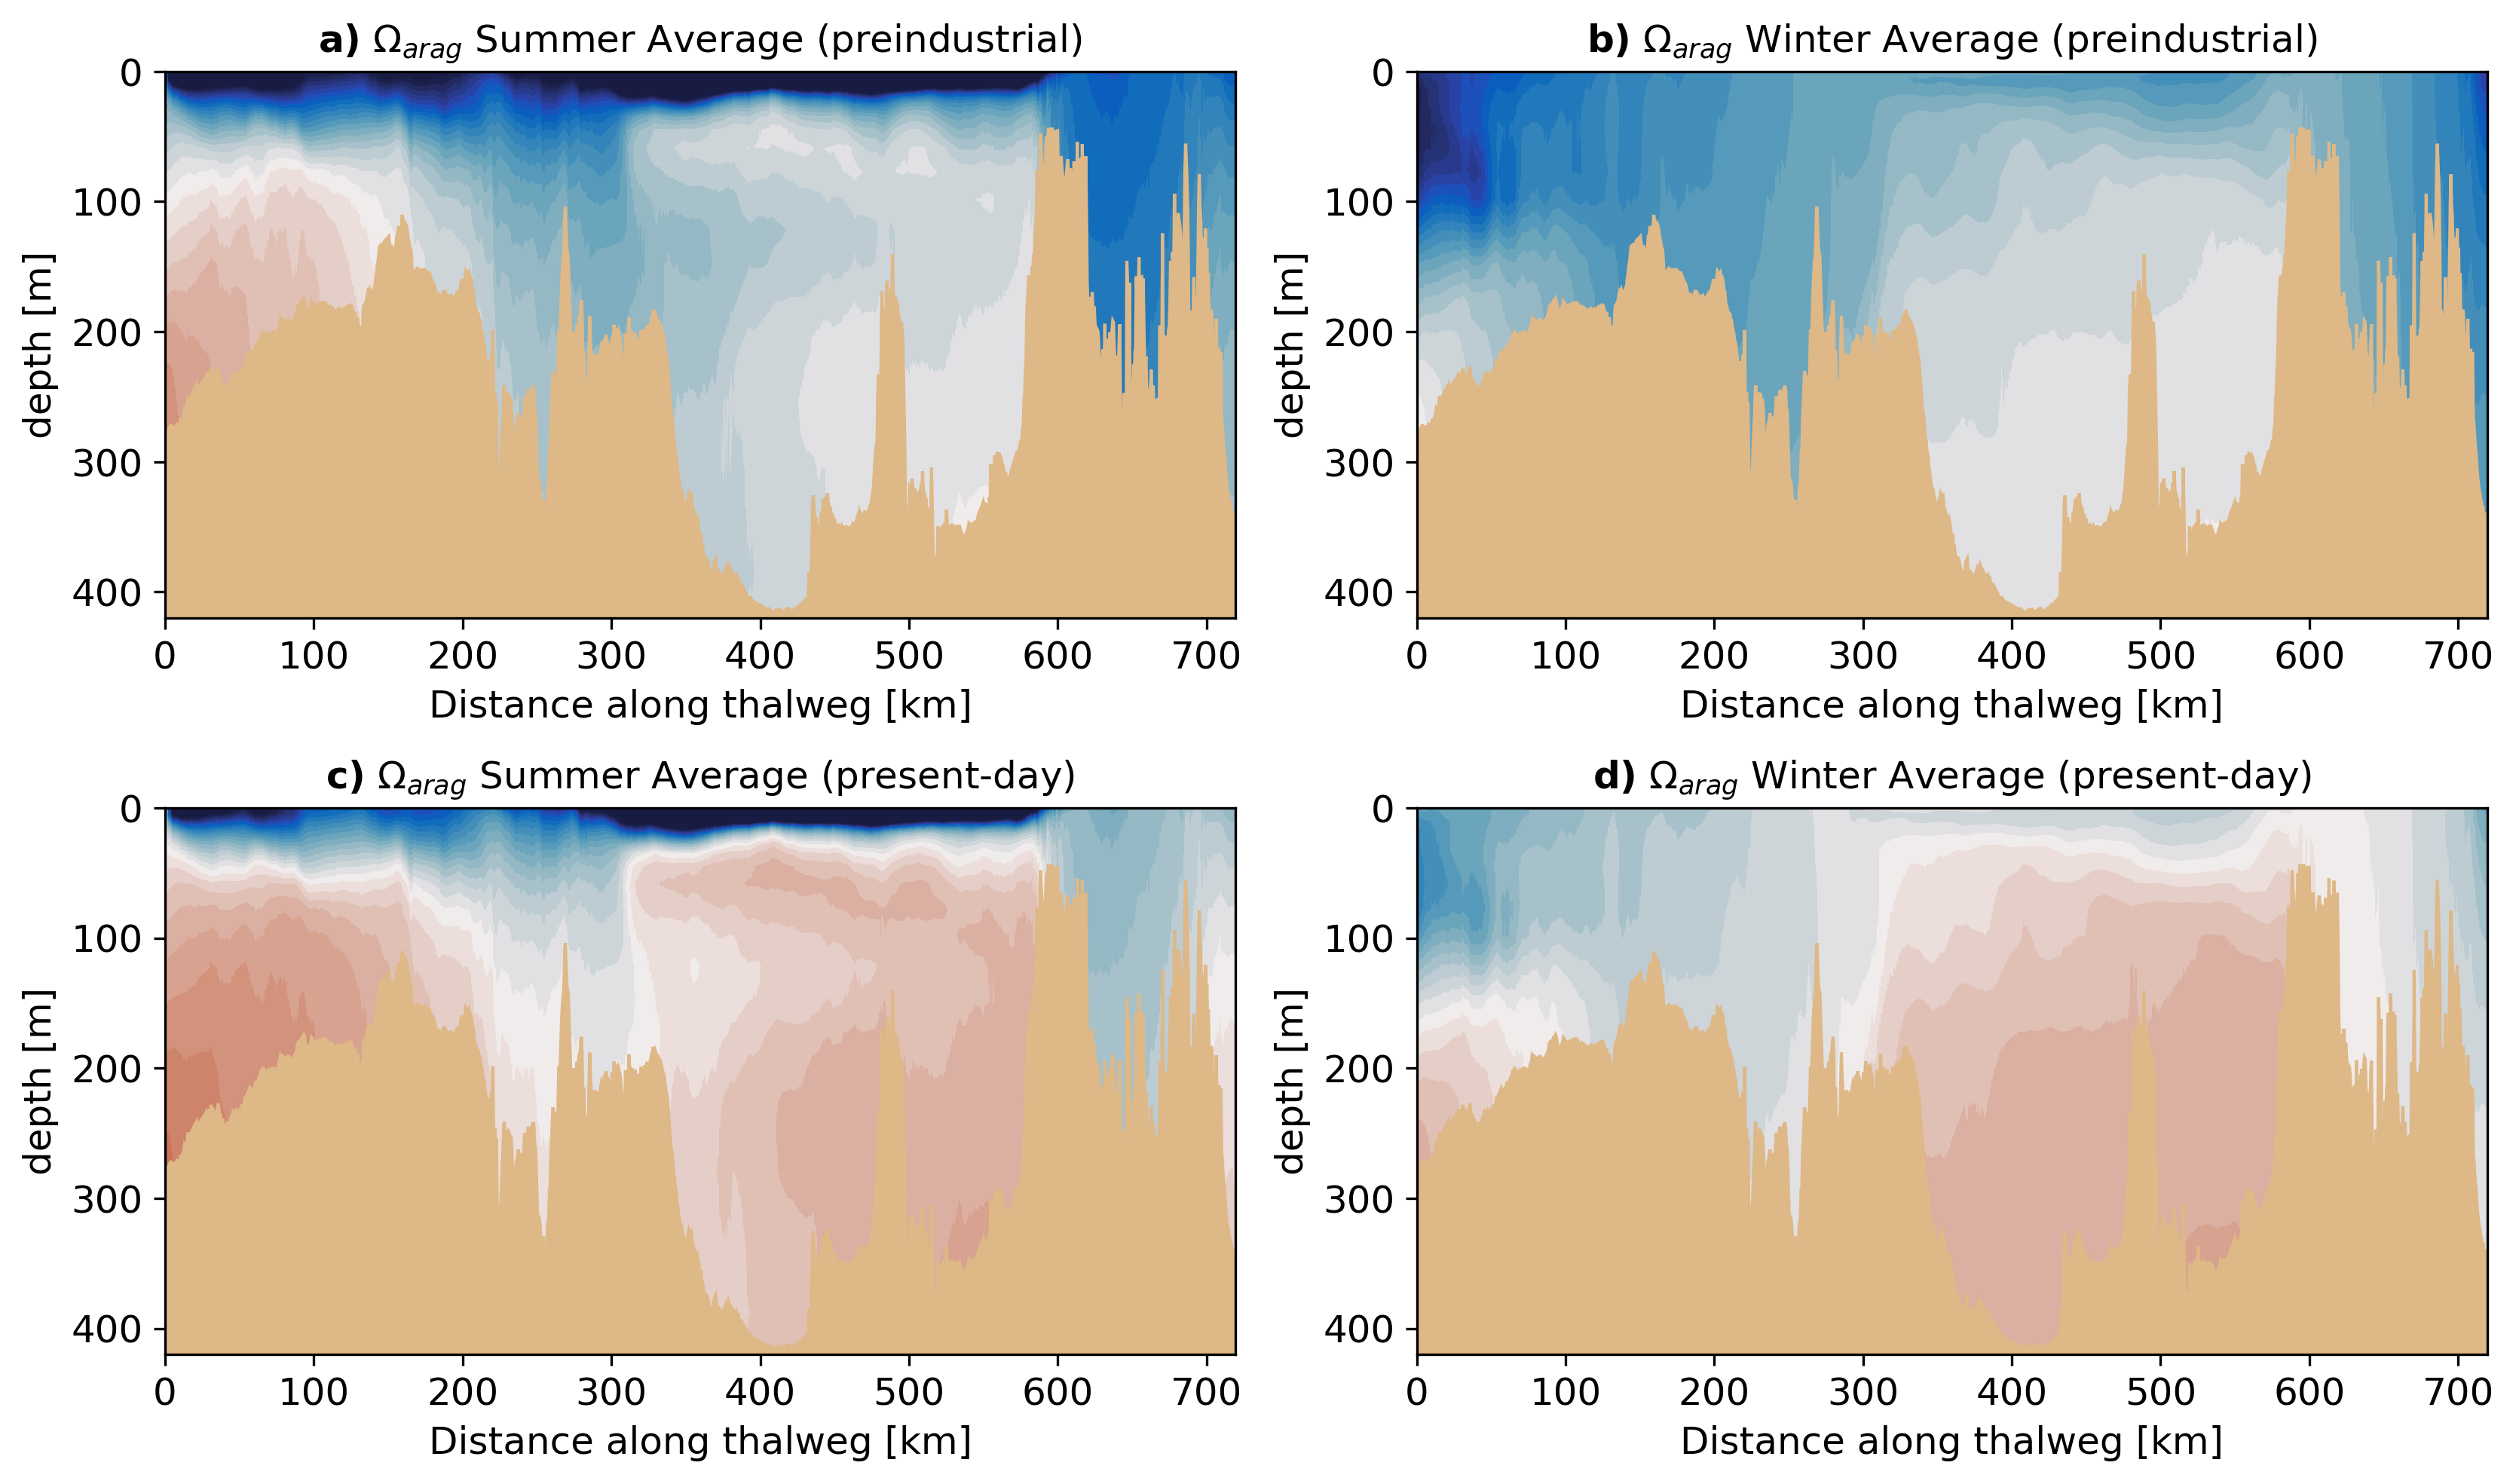

In [23]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

ts = 12 # title font
fs = 12 # all other font sizes
fact = 12
fact1 = 1.5
fact = 1.2
fig = plt.figure(figsize=(19*fact1/2.54,23*fact*(2/3)/2.54),dpi = 300)

ax1 = plt.subplot2grid((4,6), (0,0), colspan=3, rowspan=2)
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()


ax2 = plt.subplot2grid((4,6), (0,3), colspan=3, rowspan=2)
PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI9_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax2.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax2.set_ylim([0,420])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((4,6), (2,0), colspan=3, rowspan=2)
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax3.set_ylim([0,420])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((4,6), (2,3), colspan=3, rowspan=2)
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax4.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax4.set_ylim([0,420])
ax4.invert_yaxis()

plt.tight_layout()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('Fig4a_d-foregu.jpg')

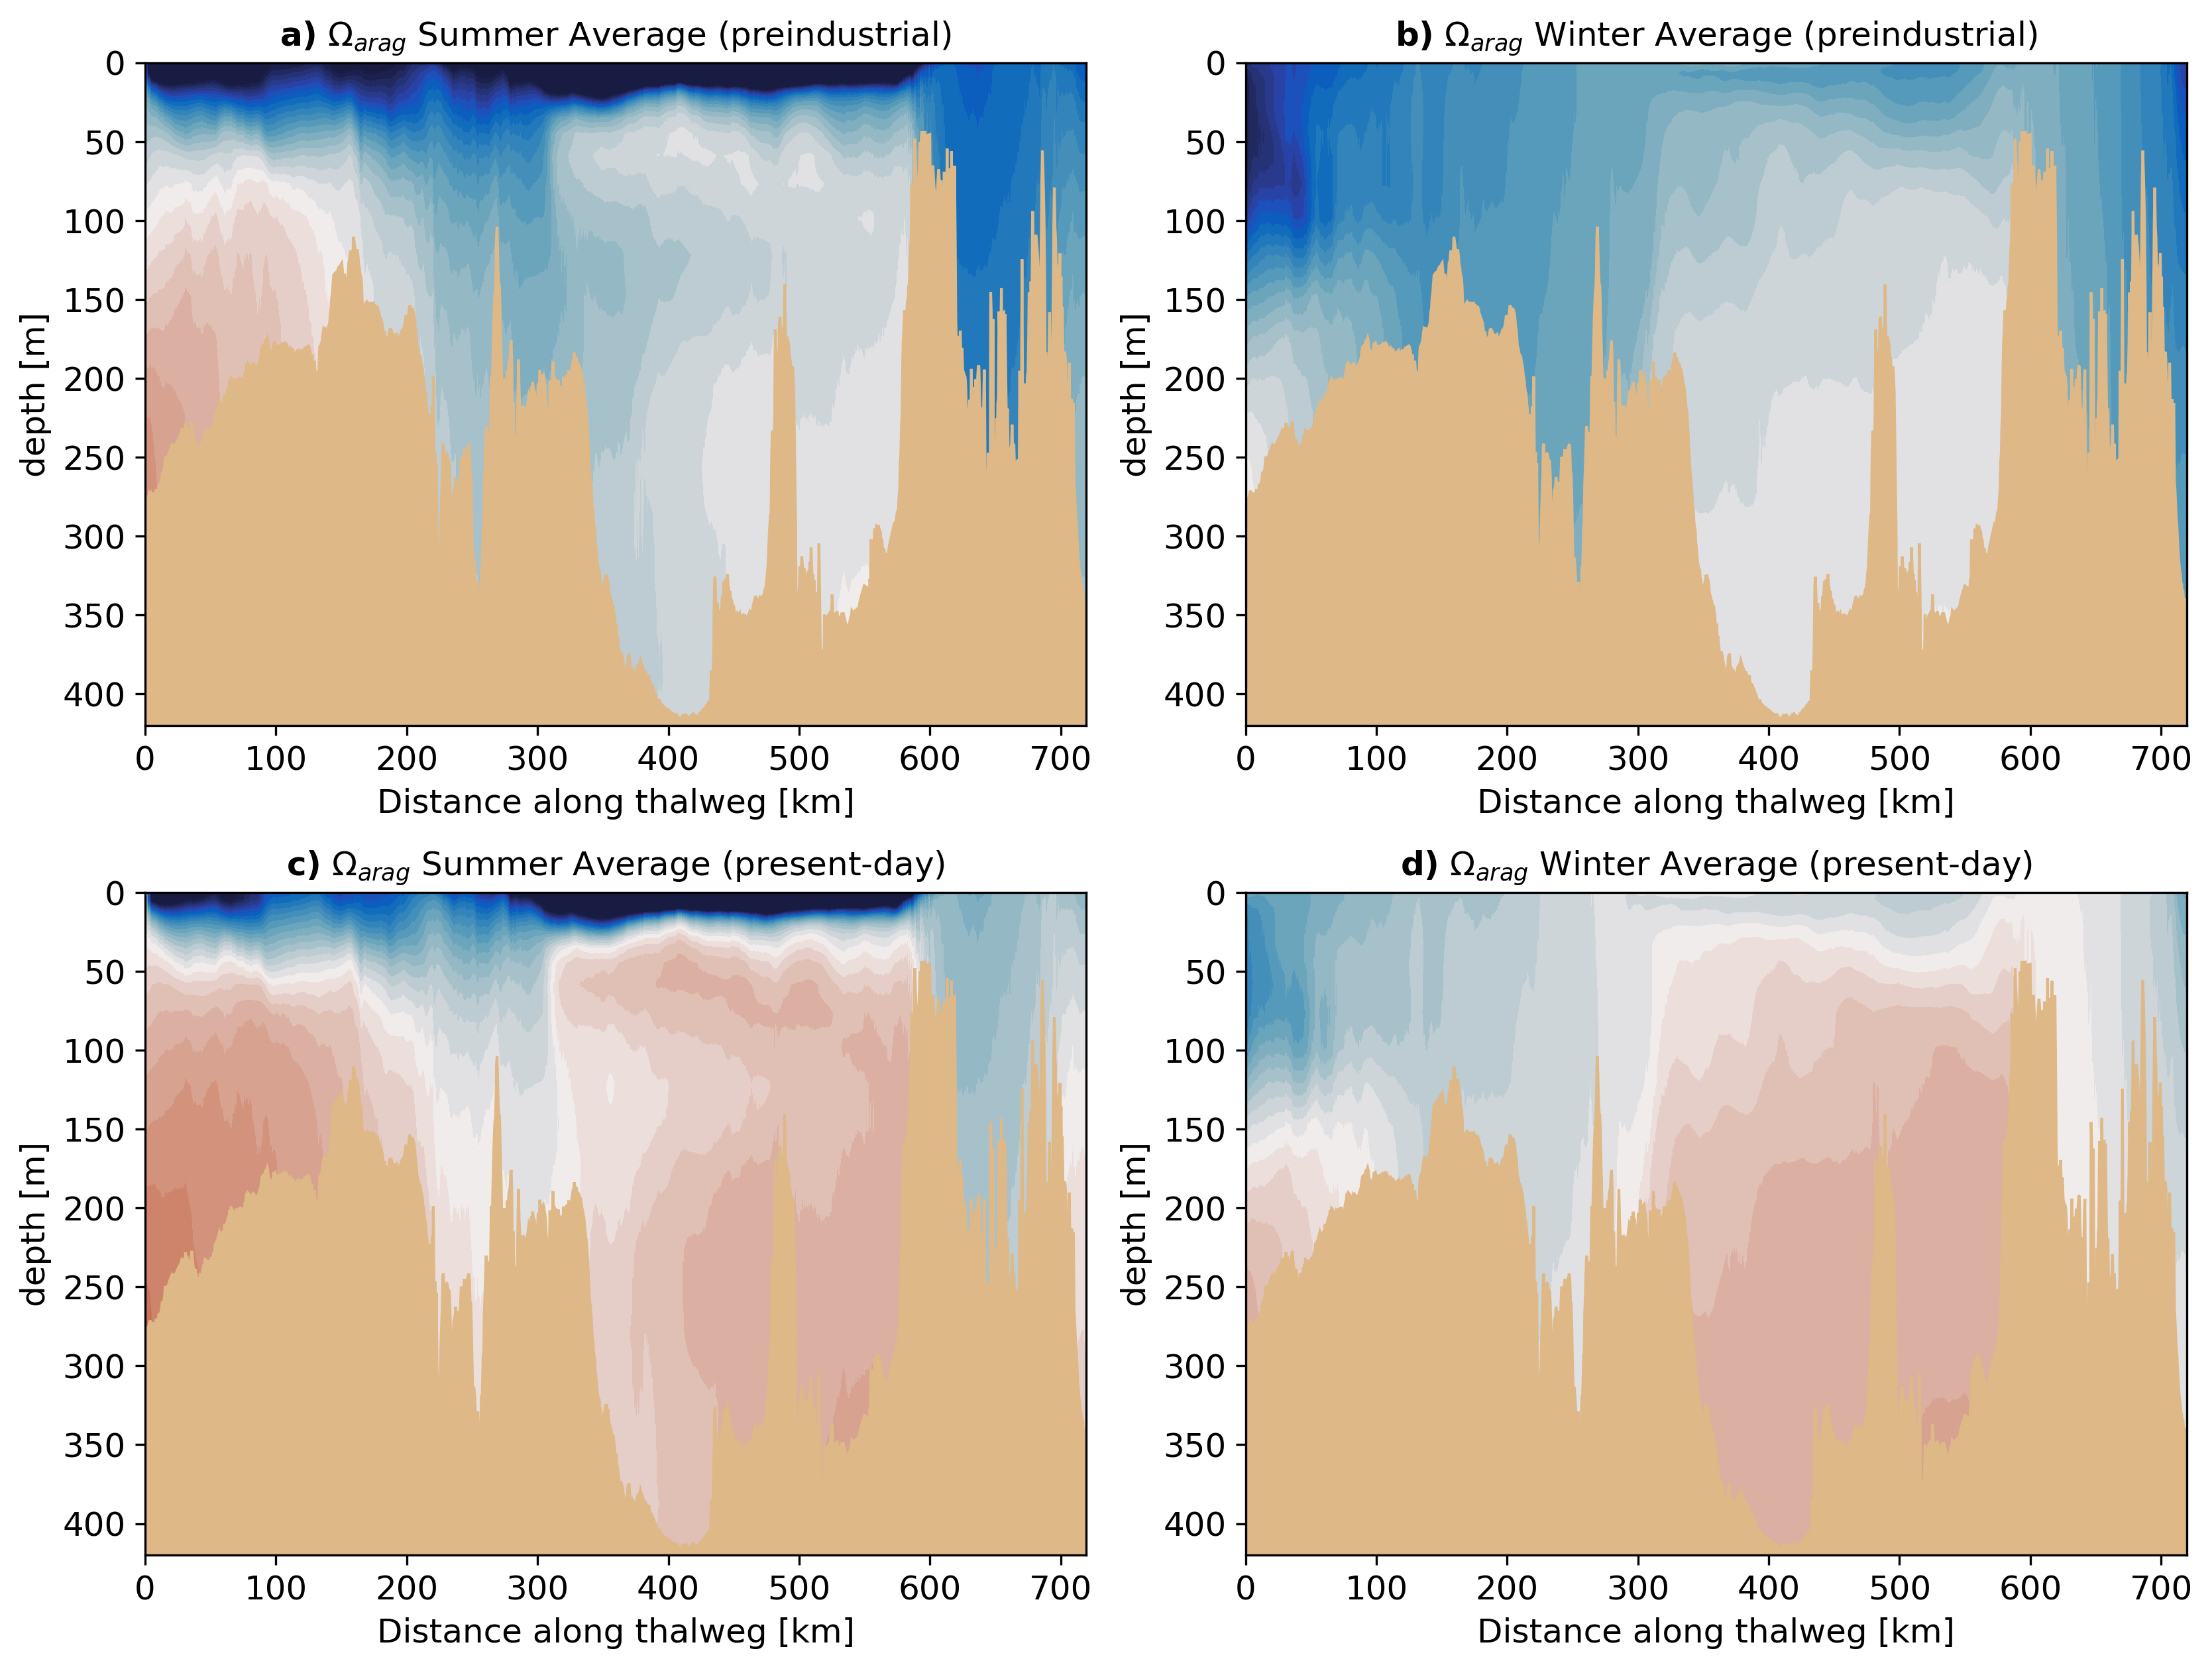

In [29]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

ts = 12 # title font
fs = 12 # all other font sizes
fact = 12
fact1 = 1.5
fact = 1.2
fig = plt.figure(figsize=(19*fact1/2.54,23*fact*(0.85)/2.54),dpi = 300)

ax1 = plt.subplot2grid((4,6), (0,0), colspan=3, rowspan=2)
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()


ax2 = plt.subplot2grid((4,6), (0,3), colspan=3, rowspan=2)
PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI9_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax2.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax2.set_ylim([0,420])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((4,6), (2,0), colspan=3, rowspan=2)
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax3.set_ylim([0,420])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((4,6), (2,3), colspan=3, rowspan=2)
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax4.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax4.set_ylim([0,420])
ax4.invert_yaxis()

plt.tight_layout()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('Fig4a_d-foregu.jpg')

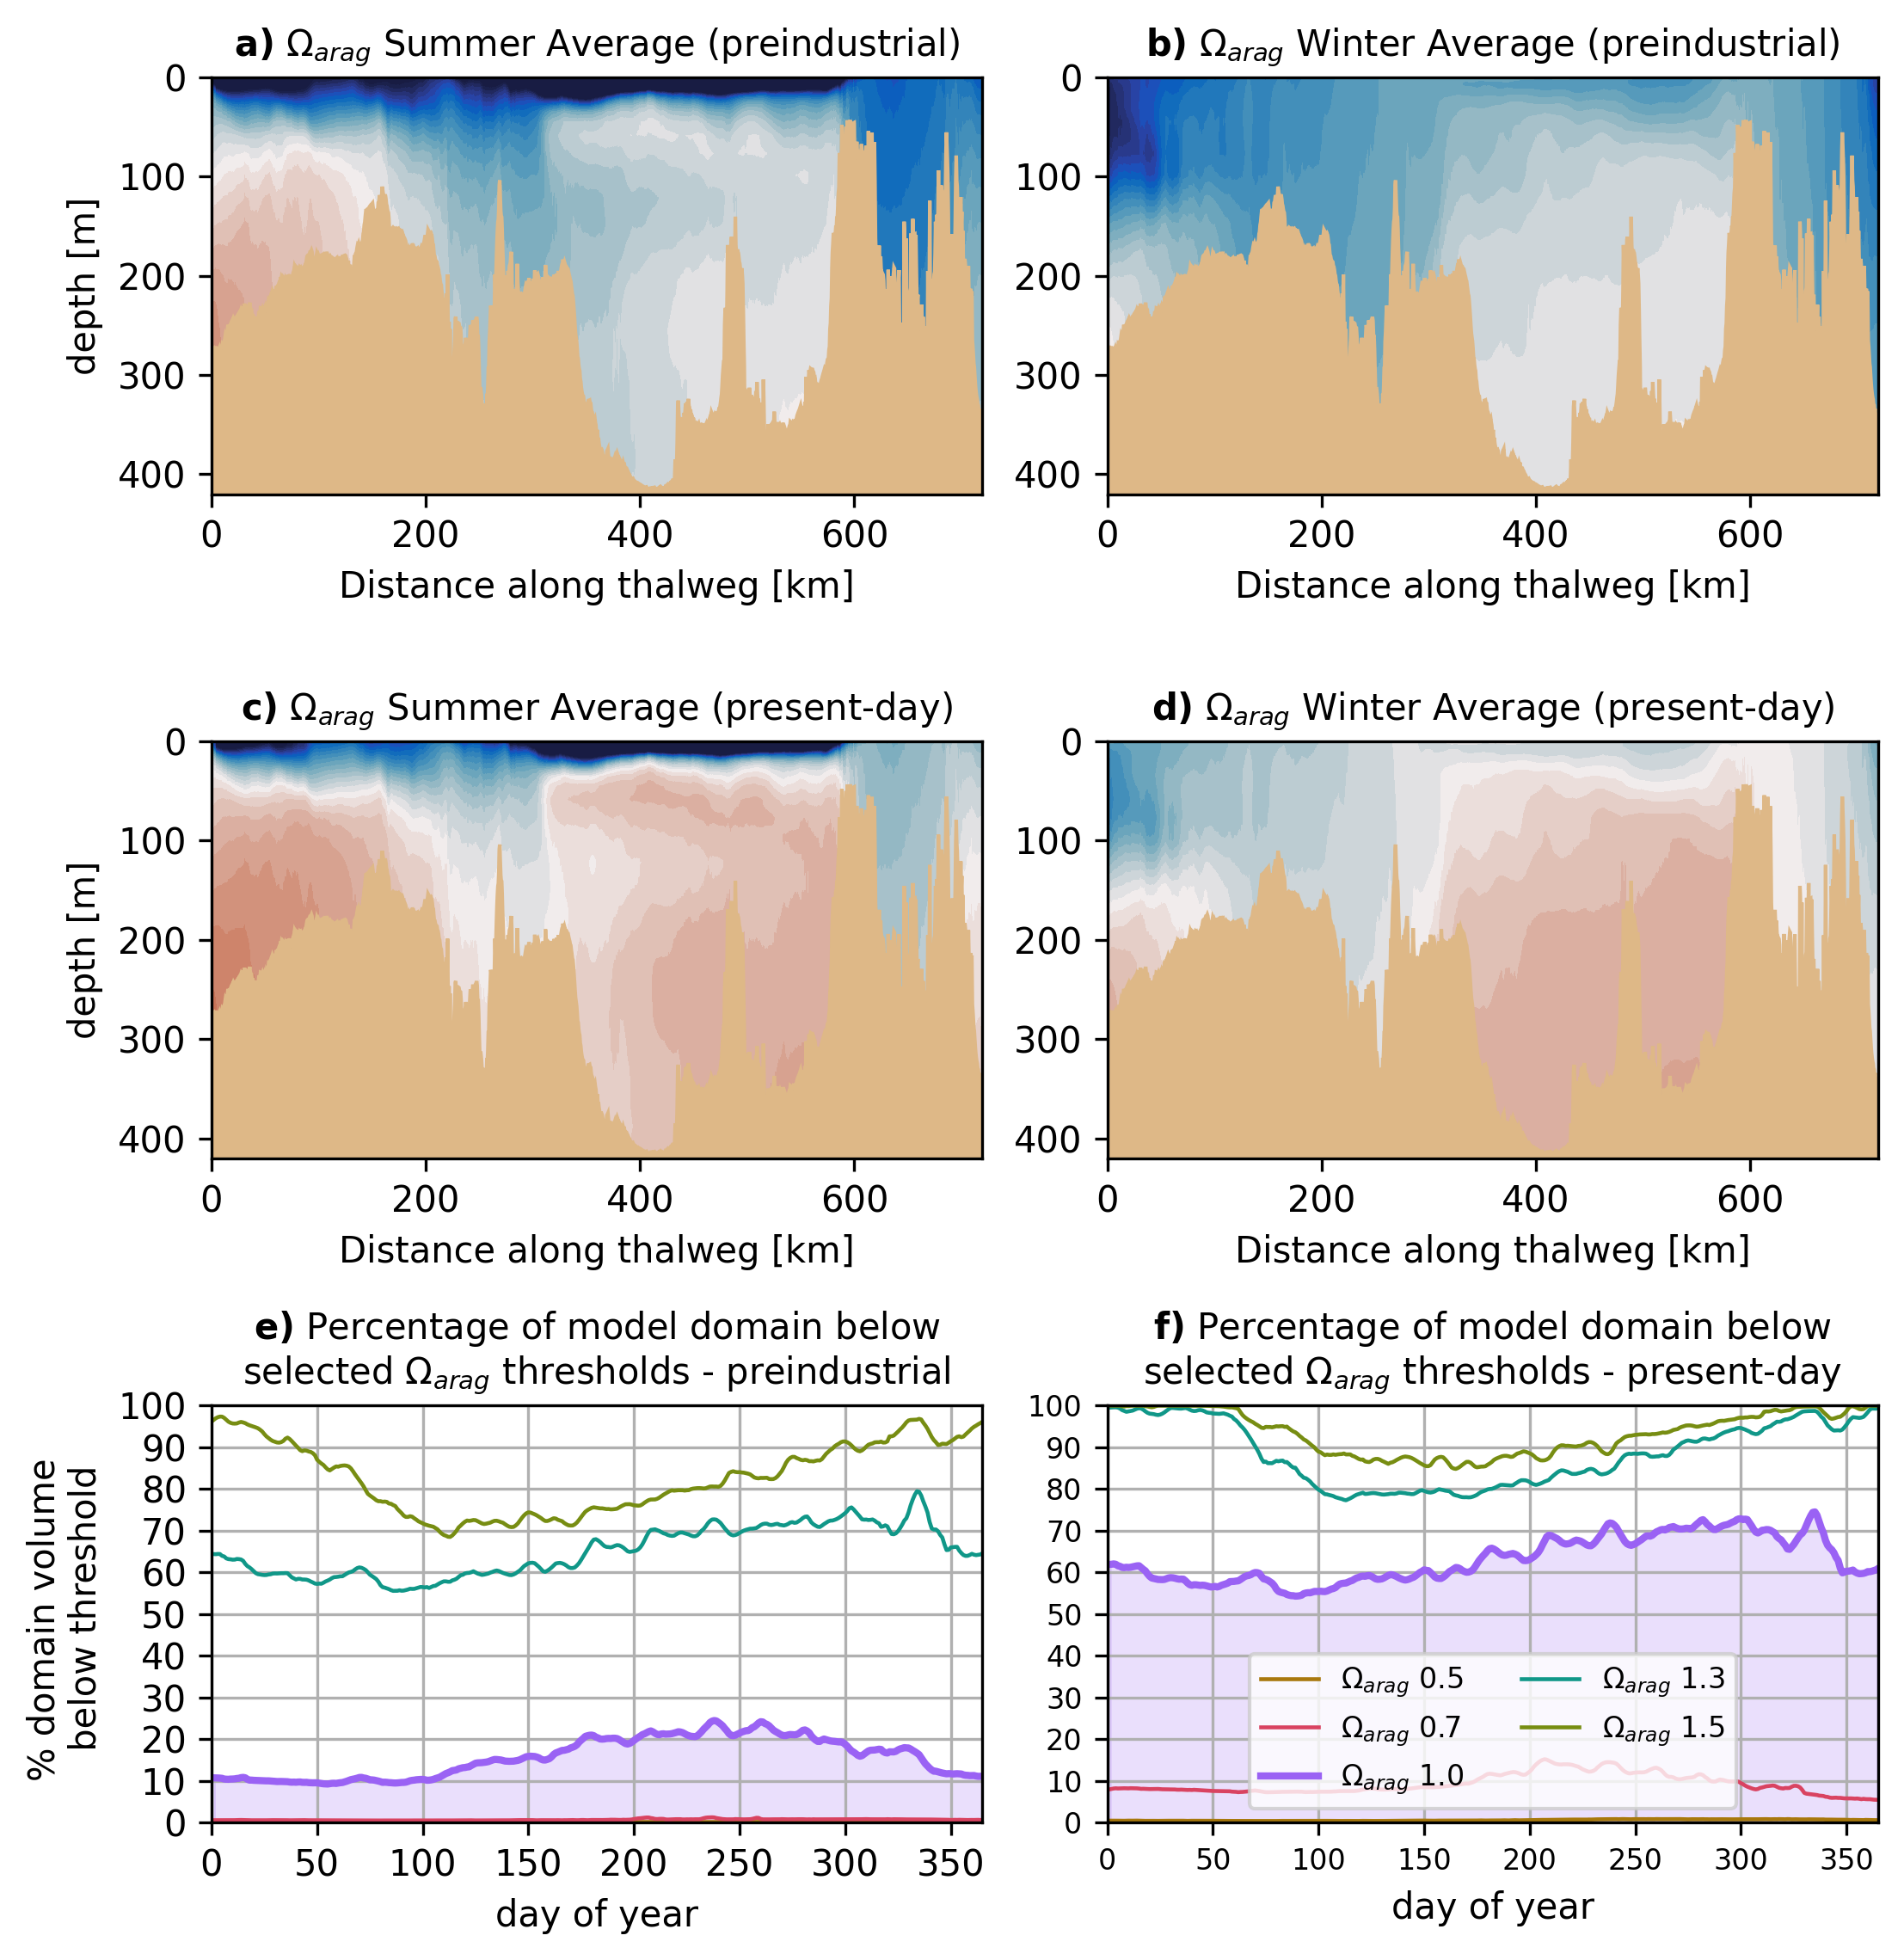

In [51]:
ts = 10
fs = 10

fig, axs = plt.subplots(3,2, figsize=(19/2.54,23*0.85/2.54), 
                        dpi = 300, facecolor='w', edgecolor='k')

axs = axs.ravel()

ax1 = axs[0]
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()

ax2 = axs[1]
PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI9_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax2.set_ylabel('', fontsize = fs)
cbar.remove()
ax2.set_ylim([0,420])
ax2.invert_yaxis()

ax3 = axs[2]
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()
ax3.set_ylim([0,420])
ax3.invert_yaxis()

ax4 = axs[3]
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax4.set_ylabel('', fontsize = fs)
cbar.remove()
ax4.set_ylim([0,420])
ax4.invert_yaxis()


ax5 = axs[4]

ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-')

ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-')
ax5.fill_between(days, np.zeros_like(days), PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)

w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
#ax5.set_title(r'$\bf{e)}$ Percentage of model domain below \r selected $\Omega_{arag}$ thresholds - preindustrial', fontsize = fs)
ax5.set_title(r"$\bf{e)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - preindustrial", fontsize = fs)
ax5.grid()

ax5 = axs[5]
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5')
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7')
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-', label = '$\Omega_{arag}$ 1.0')
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3')

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5')
ax5.fill_between(days, np.zeros_like(days), BR_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)

ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
ax5.legend(loc = 'lower center', ncol = 2, fontsize = 8 )
w = ax5.set_yticks(np.arange(0, 110, step=10))
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title(r"$\bf{f)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - present-day", fontsize = fs)
ax5.grid()

plt.tight_layout()




AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

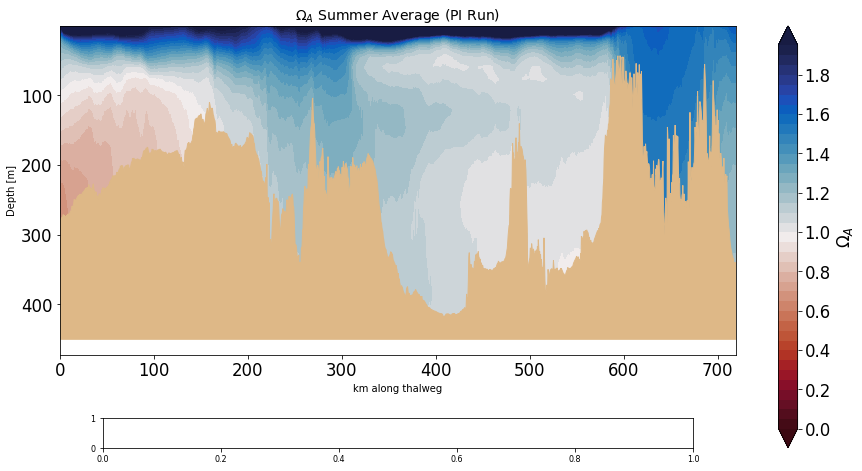

In [19]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

ts = 14 # title font
fs = 16.5 # all other font sizes
fact = 2.6
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_title('$\Omega_A$ Summer Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)

ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg')

plt.colorbar(PI9_summer_3mon, orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
# ax2 = plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
# PI5_winter_3mon[PI5_winter_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax2, PI5_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax2.set_title('$\Omega_A$ Winter Average (PI Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax2.tick_params(axis='both', which='major', labelsize=fs)
# ax2.set_xticklabels([])
# ax2.set_xlabel('')
# ax2.set_xlabel('km along thalweg')

# ax3 = plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=2)
# BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax3.set_title('$\Omega_A$ Summer Average (BR Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# ax3.set_xlabel('km along thalweg')

# ax4 = plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=2)
# BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax4.set_title('$\Omega_A$ Winter Average (BR Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax4.tick_params(axis='both', which='major', labelsize=fs)
# ax4.set_xlabel('km along thalweg')

# plt.tight_layout()
plt.savefig('Fig4cbar.png')

## legacy code

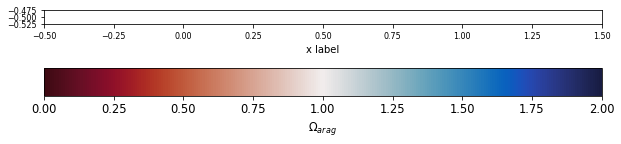

In [52]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

fs = 11.5
fig, ax = plt.subplots(figsize=(10,4))
im = ax.imshow(np.random.rand(0,2), vmin = 0, vmax = 2, cmap = cmocean.cm.balance_r)
ax.set_xlabel("x label")

cbar = fig.colorbar(im, orientation="horizontal", pad=0.2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
plt.show()

In [ ]:
# import sys
# sys.path.append('/data/tjarniko/mocsy')
# import mocsy
# tzero = 0
# tdepths = 100
# tlat = 50
# response_tup = mocsy.mvars(temp=10, sal=29, alk=2100*1e-3, dic=2000*1e-3, 
#                    sil=tzero, phos=tzero, patm=10, depth=tdepths, lat=tlat, 
#                     optcon='mol/m3', optt='Tinsitu', optp='m',
#                     optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
# pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

# print(OmegaA)